# Lotte Philippus, 11291168
# Kaj Meijer, 10509534

### List of useful links

* [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

    * [Axis labels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html)

    * [Adding a legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

* [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [$\LaTeX$ symbols](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)

*All your assignments should be **Python 3** notebooks*


# Fitting functions

For this introductory assignment, we'll be fitting some functions to data. Most of the concepts here should be familiar from the *Leren* course, except that we'll be using the *SciPy* library to fit the functions. The *SciPy* library will come in handy in later assignments, so it'll be useful to already introduce some elements here.

*Note:* There are still **10 points** that can be earned with this introductory assignment, so don't forget to hand it in together with the main assignment: *assignment_1.ipynb*.

## Q1: Generating simulation data (2 points)

Assume there is some model that is defined by the following function:

$$y = e^{\frac{3 x}{20}}$$

* Write a function `curve` which implements this model
* Generate a uniformly spaced set of 50 samples over the interval `[1, 10]` using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* Apply the curve function to the entire *ndarray* of samples using [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)
* Create an *ndarray* of noise from a Gaussian distribution with $\mu = 0.0$ and $\sigma = 1.0$ using [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)
* Add the noise to the curve results to create the artificial simulation data
* Plot the actual underlying curve as a line and the simulated data as dots, both in the same plot

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def curve(x):
    return math.exp(3*x/20)

x = np.linspace(1, 10, 50)
vcurve = np.vectorize(curve)
y = vcurve(x)
noise = np.random.normal(0.0, 1.0, 50)
noisy_y = np.add(x, noise)

plt.plot(x, y)
plt.plot(x, noisy_y, 'r.')
plt.show()

<Figure size 640x480 with 1 Axes>

## Q2: Fitting a linear model (3 points)

Now we'll use *SciPy* to fit a line through this simulation data. In *Leren* we needed to compute the partial derivative of the error function with respect to each of the model parameters to know how to modify those parameters to get the derivates (close to) zero. Here we will just define what the error function is, and let *SciPy* do the actual minimization work.

The first model will be a very basic linear one, with only 1 parameter `a`:

$$y = ax$$

*(note: this line will always pass through the origin)*

* Write a function `linear` which implements this model
* Write a function `MSE` which computes the *Mean Squared Error* of an array of model estimates `y_hat` and an array of observed data `y`

Already provided is a general function called `MSE_fit_func` which takes 4 arguments:

1. *params:* A set of model parameters for the model function
2. *func:* The model function that is being applied
3. *x:* An array of x values
4. *y:* An array of y values

This function applies the model function to the *x* values using the model parameters and computes the resulting *MSE* with the observed *y* values. Assuming the data (i.e. the *x* and *y* values) and the model function are fixed, the model parameter(s) can be varied and the function will return an *MSE* for each parameter setting.

The *SciPy* module *optimize* has a lot of functions to solve exactly this type of problem, where you change some parameters in order to minimize some function. As the current linear model has only one variable, we'll use the function [minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)

The function we want to minimize is the `MSE_fit_func` (i.e. the MSE of applying the model function to the data), and as the minimization method we'll use `Brent`. There are quite a few different minimization methods *SciPy* offers, but we won't worry about their differences for now and just use the simple `Brent` method. All minimization functions will try and minimize the returned value of the function by varying its **first argument**. The other function arguments will remain fixed and may be provided with optional argument `args`.

* Finish the call to `minimize_scalar` by filling in the correct values for `args` to fit the linear model to the simulation data generated in *Q1*.

The variable `fit` will now be an [OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult) object.

* Print the variable `fit` and some of its attributes to inspect the results of the minimization
* Write in comments what the value of `a` is that minimizes the linear model MSE on your data
* Plot the simulation data as dots and the fitted linear model as a line, both in the same plot

     fun: 0.0740314922090826
    nfev: 9
     nit: 5
 success: True
       x: 0.43156182973395885


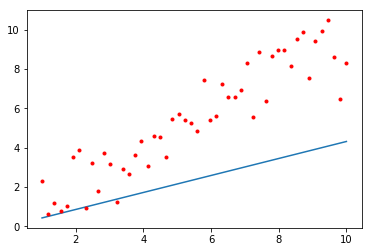

In [2]:
from scipy import optimize

def linear(x, a):
    return a*x
    

def MSE(y_hat, y):
    error = np.subtract(y_hat, y)
    squared_error = np.power(error, 2)
    return sum(squared_error)/len(squared_error)
    

def MSE_fit_func(params, func, x, y):
    return MSE(func(x, params), y)

# best fit is a = 0.43156182973395885 
fit = optimize.minimize_scalar(MSE_fit_func, method='Brent', args=(linear, x, y))


print(fit)

plt.plot(x, linear(x, fit.x))
# plt.plot(x, y)
plt.plot(x, noisy_y, 'r.')
plt.show()

## Q3: Fitting a polynomial model (2 points) 

Next we'll create a new model using a $4^{th}$-order polynomial function:

$$y=b_0+b_1x+b_2x^2+b_3x^3+b_4x^4$$

* Write a function `polynomial` which implements this model, with the argument *b* being an *ndarray* containing all model parameters $b_0 \dots b_4$

When minimizing multiple parameters, we'll need to provide starting values for `b`, from where the minimization function will start the search. For now, you should use `np.array([-5, 9, -4, 1, .01])` as the starting point and we'll come back to selecting sensible starting values for the parameters later.

* Use the function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to fit the polynomial model to the generated data from *Q1* using the `Nelder-Mead` method
* Write in comments what the value of `b` is that minimizes the polynomial model MSE on your data
* Plot the simulation data as dots and the fitted polynomial model as a line, both in the same plot

 final_simplex: (array([[9.95521456e-01, 1.55573728e-01, 9.51850624e-03, 6.98597459e-04,
        2.76313281e-05],
       [9.91978104e-01, 1.57674643e-01, 9.06364613e-03, 7.49205595e-04,
        2.56296232e-05],
       [9.85723586e-01, 1.62540077e-01, 7.67084675e-03, 9.16520881e-04,
        1.83184765e-05],
       [1.00977291e+00, 1.38691742e-01, 1.50145193e-02, 1.94257076e-05,
        5.65339196e-05],
       [1.00601445e+00, 1.45897408e-01, 1.20505887e-02, 4.24945932e-04,
        3.86967219e-05],
       [9.92503902e-01, 1.54238888e-01, 1.11321395e-02, 3.50346837e-04,
        4.87319627e-05]]), array([1.01675820e-06, 1.19415319e-06, 1.93669150e-06, 2.11823297e-06,
       3.32305748e-06, 3.40942984e-06]))
           fun: 1.016758195456218e-06
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 1000
           nit: 619
        status: 1
       success: False
             x: array([9.95521456e-01, 1.55573728e-01, 9.51850624e-03, 6.98597459e-04,
     

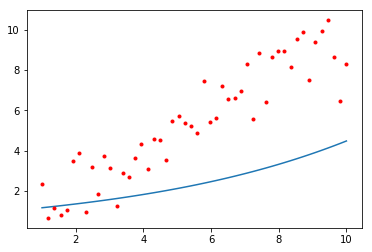

In [3]:
def polynomial(x, b):
    return b[0] + b[1]*x + b[2]*(x**2) + b[3]*(x**3) + b[4]*(x**4)


# initial guess
b = np.array([-5, 9, -4, 1, .01])

# best fit is b = array([9.95521456e-01, 1.55573728e-01, 9.51850624e-03, 6.98597459e-04, 2.76313281e-05])
fit = optimize.minimize(MSE_fit_func, b, method='Nelder-Mead', args=(polynomial, x, y))

print(fit)

plt.plot(x, polynomial(x, fit.x))
plt.plot(x, noisy_y, 'r.')
plt.show()

## Q4: Fitting Ebbinghaus data (3 points)
  
Now let's look at some real data.
  
Ebbinghaus proposed the following equation to best described how savings change over time:

$$  Q(t) = \frac{u_1} {(log_{10}(t)^{a_1} + u_1)} $$

where $Q(t)$ are the savings at time interval $t$, and $u_1$ and $a_1$ are the model parameters. Note that he calculated the best fitting parameters by hand, using *minutes* for the time interval. According to these calculations he suggested that $u_1= 1.84$ and $a_1 = 1.25$ were the best fitting parameters.  

* Write a function `ebbinghaus` which implements this model, with the argument *params* being an *ndarray* containing the model parameters $u_1$ and $a_1$

Next we'll load the data contained in *Ebbinghaus.txt* to try and fit our own model. The code for this has already been provided.

* Use the function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to fit the Ebbinghaus model to the loaded Ebbinghaus data using the `Nelder-Mead` method
* Write in comments what the values of $u_1$ and $a_1$ are that minimize the Ebbinghaus model MSE on the data
* Plot the measured data, Ebbinghaus' manually fitted model and your minimized model, all in the same plot, and label each line

Later the simpler exponential function has been proposed which is described by the equation

$$ Q(t)=(1+u_1t)^{-a_1} $$   

where $Q(t)$ are the savings at time interval $t$, and $u_1$ and $a_1$ are the model parameters.   

* Write a function `exponential` which implements this model, with the argument *params* being an *ndarray* containing the model parameters $u_1$ and $a_1$
* Use the function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to fit the exponential model to the loaded Ebbinghaus data using the `Nelder-Mead` method
* Write in comments what the values of $u_1$ and $a_1$ are that minimize the exponential model MSE on the data
* Plot the measured data, your minimized Ebbinghaus model and your minimized exponential model, all in the same plot, and label each line
* Print out the MSE for both fitted models and compare them


In [10]:
def ebbinghaus(t, params):
    return params[0] / (np.log10(t)**params[1] + params[0])

data = np.loadtxt('Ebbinghaus.txt', skiprows=1)
minutes = data[:, 0] / 60
savings = data[:, 1]


def exponential(t, params):
    return (1 + params[0] * t)**-params[1]

 final_simplex: (array([[1.7972465 , 1.20519797],
       [1.79725692, 1.20522416],
       [1.79731065, 1.20522764]]), array([0.00031176, 0.00031176, 0.00031176]))
           fun: 0.0003117564312440326
       message: 'Optimization terminated successfully.'
          nfev: 58
           nit: 30
        status: 0
       success: True
             x: array([1.7972465 , 1.20519797])


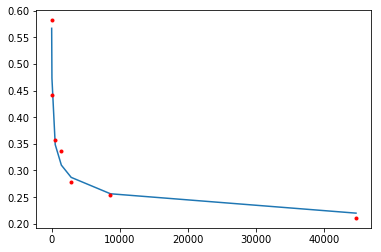

In [11]:
# initial guess
params = np.array([1.84, 1.25])

# best fit is params = array([4.91095903, 1.20522282])
fit = optimize.minimize(MSE_fit_func, params, method='Nelder-Mead', args=(ebbinghaus, minutes, savings))

print(fit)

plt.plot(minutes, ebbinghaus(minutes, fit.x))
plt.plot(minutes, savings, 'r.')
plt.show()

 final_simplex: (array([[4.56520415, 0.13036504],
       [4.56511315, 0.13036539],
       [4.56510857, 0.13036529]]), array([0.00040994, 0.00040994, 0.00040994]))
           fun: 0.0004099414341323383
       message: 'Optimization terminated successfully.'
          nfev: 186
           nit: 96
        status: 0
       success: True
             x: array([4.56520415, 0.13036504])


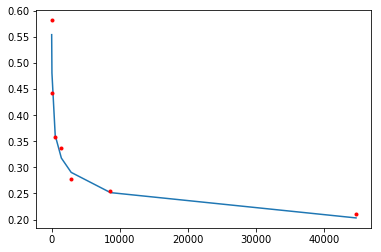

In [12]:
# initial guess
params = np.array([1.84, 1.25])

# best fit is params = array([4.5651946 , 0.13036505])
fit = optimize.minimize(MSE_fit_func, params, method='Nelder-Mead', args=(exponential, minutes, savings))

print(fit)

plt.plot(minutes, exponential(minutes, fit.x))
plt.plot(minutes, savings, 'r.')
plt.show()